# Import

In [68]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns

import matplotlib.pyplot as plt

# Exploration

In [69]:
# to export the csv from github link
url = "https://raw.githubusercontent.com/louiskuhn/IA-P3-Euskadi/main/Projets/Projet%20P5%20-%20IMDB/5000_movies_bis.csv"

# to read the csv
df = pd.read_csv(url)

# let's have a first look
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [70]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [71]:
df_subset = df[["director_name","actor_1_name","actor_2_name","actor_3_name","genres","imdb_score"]]

In [72]:
df_subset.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,imdb_score
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,7.1
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,6.8
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,8.5
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,7.1


In [73]:
df_subset.shape

(5043, 6)

In [74]:
missing_values = df.isna()
missing_count = missing_values.sum()
print("Colonnes avec des valeurs manquantes :")
print(missing_count[missing_count > 0])

Colonnes avec des valeurs manquantes :
color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
actor_1_name                7
actor_3_name               23
facenumber_in_poster       13
plot_keywords             153
num_user_for_reviews       21
language                   12
country                     5
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
aspect_ratio              329
dtype: int64


In [75]:
missing_values = df_subset.isna()
missing_count = missing_values.sum()
print("Colonnes avec des valeurs manquantes :")
print(missing_count[missing_count > 0])

Colonnes avec des valeurs manquantes :
director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
dtype: int64


In [76]:
df_dropna = df_subset.dropna()
print(df_dropna)

          director_name     actor_1_name        actor_2_name  \
0         James Cameron      CCH Pounder    Joel David Moore   
1        Gore Verbinski      Johnny Depp       Orlando Bloom   
2            Sam Mendes  Christoph Waltz        Rory Kinnear   
3     Christopher Nolan        Tom Hardy      Christian Bale   
5        Andrew Stanton     Daryl Sabara     Samantha Morton   
...                 ...              ...                 ...   
5037       Edward Burns      Kerry Bishé  Caitlin FitzGerald   
5038        Scott Smith      Eric Mabius       Daphne Zuniga   
5040   Benjamin Roberds      Eva Boehnke       Maxwell Moody   
5041        Daniel Hsia        Alan Ruck       Daniel Henney   
5042           Jon Gunn      John August    Brian Herzlinger   

              actor_3_name                           genres  imdb_score  
0                Wes Studi  Action|Adventure|Fantasy|Sci-Fi         7.9  
1           Jack Davenport         Action|Adventure|Fantasy         7.1  
2        

In [77]:
missing_values = df_dropna.isna()
missing_count = missing_values.sum()
print("Colonnes avec des valeurs manquantes :")
print(missing_count[missing_count > 0])

Colonnes avec des valeurs manquantes :
Series([], dtype: int64)


<Axes: >

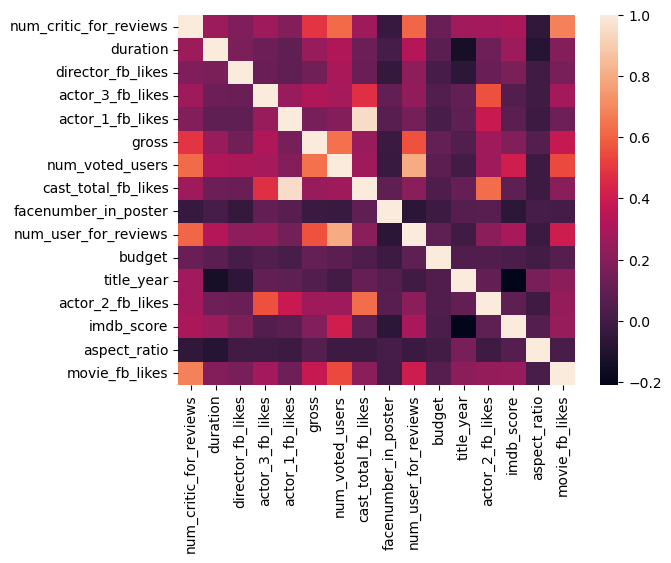

In [78]:
sns.heatmap(df.corr())

In [79]:
df_dropna.drop_duplicates(inplace=True)
df_dropna.shape

c:\Users\lacom\anaconda3\Lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(4796, 6)

# Top 20 directors based on the IMDB ratings


C:\Users\lacom\AppData\Local\Temp\ipykernel_16904\2551705025.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


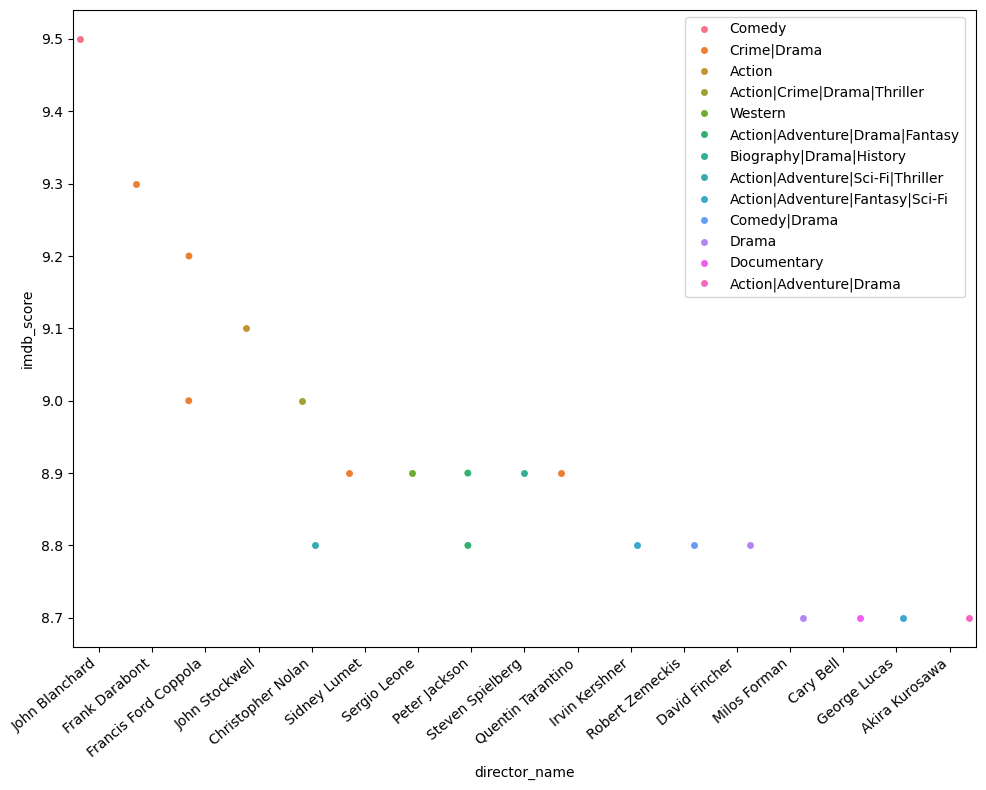

In [80]:
plt.figure(figsize=(10, 8))

# sort the DataFrame with score and keep top 20
movie_df = df_dropna.sort_values(by='imdb_score', ascending=False).head(20)

# graph
ax = sns.stripplot(x='director_name', y='imdb_score', hue='genres', data=movie_df, dodge=True, jitter=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.67, 1), loc='upper left')
plt.show()

C:\Users\lacom\AppData\Local\Temp\ipykernel_16904\1150032602.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


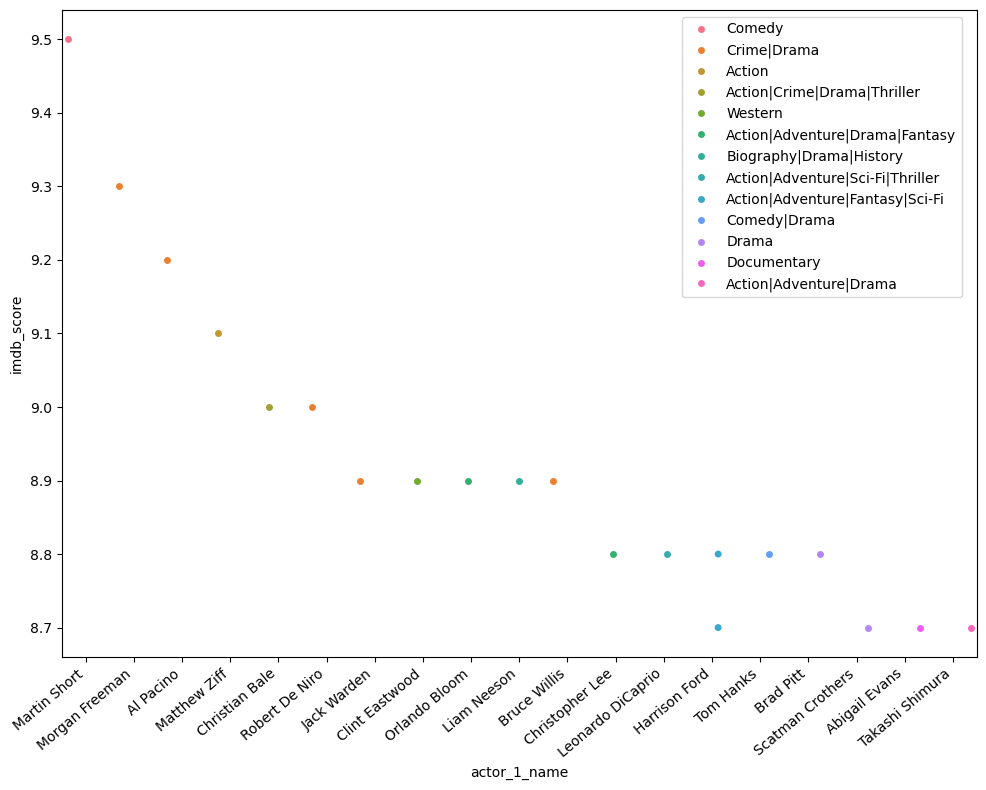

In [81]:
plt.figure(figsize=(10, 8))

# sort the DataFrame with score and keep top 20
movie_df = df_dropna.sort_values(by='imdb_score', ascending=False).head(20)

# graph
ax = sns.stripplot(x='actor_1_name', y='imdb_score', hue='genres', data=movie_df, dodge=True, jitter=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.67, 1), loc='upper left')
plt.show()

In [82]:
# #Label encoding the categorical columns
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# cat_list=['director_name', 'actor_2_name',
#         'genres', 'actor_1_name',
#         'actor_3_name']
# df_dropna[cat_list]=df_dropna[cat_list].apply(lambda x:le.fit_transform(x))

In [83]:
df_dropna.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,imdb_score
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,7.1
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,6.8
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,8.5
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,6.6


c:\Users\lacom\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\lacom\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

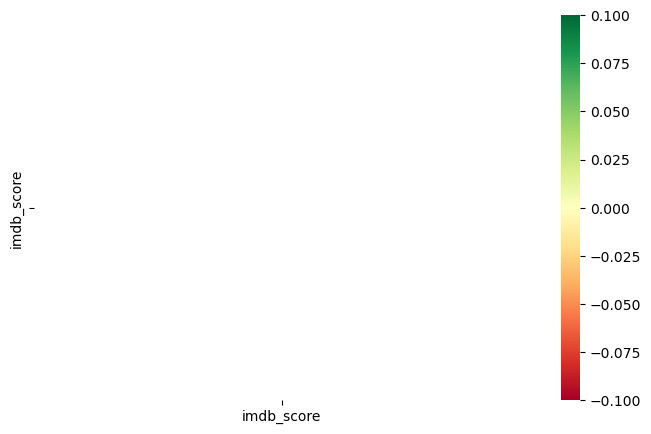

In [84]:
#Finding Correlation between variables
corr = df_dropna.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [85]:
actor_counts = df_dropna['actor_1_name'].value_counts()
print("Nombre d'apparitions de chaque acteur :", actor_counts)

num_unique_actors = df_dropna['actor_1_name'].nunique()
print("Nombre d'acteurs différents :", num_unique_actors)


Nombre d'apparitions de chaque acteur : Robert De Niro       48
Johnny Depp          36
Nicolas Cage         32
Denzel Washington    29
Matt Damon           28
                     ..
Janet Jackson         1
Phil Vischer          1
Caroline Munro        1
Jensen Ackles         1
John August           1
Name: actor_1_name, Length: 2034, dtype: int64
Nombre d'acteurs différents : 2034


In [92]:
director_counts = df_dropna['director_name'].value_counts()
print("Nombre d'apparitions de chaque directeur :", director_counts)

num_unique_director = df_dropna['director_name'].nunique()
print("Nombre de directeurs différents :", num_unique_director)

Nombre d'apparitions de chaque directeur : Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        16
                    ..
Alan Rudolph         1
Lajos Koltai         1
Takeshi Kitano       1
Peter Care           1
Daniel Hsia          1
Name: director_name, Length: 2385, dtype: int64
Nombre de directeurs différents : 2385


In [93]:
genres_counts = df_dropna['genres'].value_counts()
print("Nombre d'apparitions de chaque genre :", genres_counts)

num_unique_genres = df_dropna['genres'].nunique()
print("Nombre de genre différents :", num_unique_genres)

Nombre d'apparitions de chaque genre : Drama                                    230
Comedy                                   197
Comedy|Drama                             187
Comedy|Drama|Romance                     182
Comedy|Romance                           153
                                        ... 
Action|Western                             1
Adventure|Animation|Comedy|Family|War      1
Biography|Comedy|Drama|History|Music       1
Biography|Drama|Family|History|Sport       1
Comedy|Crime|Horror                        1
Name: genres, Length: 897, dtype: int64
Nombre de genre différents : 897


# MODEL

In [87]:
X = df_dropna[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres']]
y = df_dropna['imdb_score']
y


0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5037    6.4
5038    7.7
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 4796, dtype: float64

In [88]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)

(3357, 5)
(3357,)
